<a href="https://colab.research.google.com/github/AlexisLeandroVallejos/ProcesamientoDeTablas/blob/main/ProcesamientoDeTablas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#DescomprimirZip
!unzip "/content/drive/MyDrive/properati-AR-2018-02-01-properties-sell.csv.zip"

Archive:  /content/drive/MyDrive/properati-AR-2018-02-01-properties-sell.csv.zip
  inflating: properati-AR-2018-02-01-properties-sell.csv  


In [6]:
#plotear mapa
!pip install basemap
from mpl_toolkits.basemap import Basemap

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [10]:
#leer csv
propiedades = pd.read_csv('/content/drive/MyDrive/properati-AR-2018-02-01-properties-sell.csv.zip')

#Coordenadas centro geografico
monumentoCidCampeador = {'LATITUD' : -34.60344836517273,
                         'LONGITUD' : -58.44534783527577}

#Constantes
CONSTANTE_LIMITE = 0.05
CONSTANTE_Q1Q3 = 1.5
DOS_AMBIENTES = 2
TRES_AMBIENTES = 3
DEPARTAMENTO = 'apartment'
BS_AS_ZONA_SUR = 'Bs.As. G.B.A. Zona Sur'
BS_AS_COSTA = 'Buenos Aires Costa Atlántica'
CAPITAL_FEDERAL = 'Capital Federal'
SANTA_FE = 'Santa Fe'
ROSARIO = 'Rosario'
CORDOBA = 'Córdoba'
LA_PLATA = 'La Plata'
MAR_DEL_PLATA = 'Mar del Plata'
CENTRO = 'Centro'
LATITUD_MINIMA = monumentoCidCampeador['LATITUD'] - CONSTANTE_LIMITE
LATITUD_MAXIMA = monumentoCidCampeador['LATITUD'] + CONSTANTE_LIMITE
LONGITUD_MINIMA = monumentoCidCampeador['LONGITUD'] - CONSTANTE_LIMITE
LONGITUD_MAXIMA = monumentoCidCampeador['LONGITUD'] + CONSTANTE_LIMITE

#Booleanos para el loc
enCapitalFederal = propiedades.state_name == CAPITAL_FEDERAL
deDosAmbientes = propiedades.rooms == DOS_AMBIENTES
esDepartamento = propiedades.property_type == DEPARTAMENTO
tieneLatitud = propiedades.lat.notnull()
tieneLongitud = propiedades.lon.notnull()
esLatitudCercana = propiedades.lat.between(LATITUD_MINIMA, LATITUD_MAXIMA)
esLongitudCercana = propiedades.lon.between(LONGITUD_MINIMA, LONGITUD_MAXIMA)
tieneInformacionGeografica = tieneLatitud & tieneLongitud
esCercanoAlCentroGeograficoCapFed = esLatitudCercana & esLongitudCercana
deTresAmbientes = propiedades.rooms == TRES_AMBIENTES 
enRosario = (propiedades.state_name == SANTA_FE) & (propiedades.place_name == ROSARIO)
enCordoba = (propiedades.state_name == CORDOBA) & (propiedades.place_name == CENTRO)
enLaPlata = (propiedades.state_name == BS_AS_ZONA_SUR) & (propiedades.place_name == LA_PLATA)
enMarDelPlata = (propiedades.state_name == BS_AS_COSTA) & (propiedades.place_name == MAR_DEL_PLATA)

In [11]:
#Punto3_1_1
#aplica filtros
dptos2AmbEnCaba = propiedades.loc[enCapitalFederal & deDosAmbientes & esDepartamento]
precioMedio = dptos2AmbEnCaba['price'].mean()
print("Precio medio de dptos de 2 ambientes en CABA: $ " + str(precioMedio))

Precio medio de dptos de 2 ambientes en CABA: $ 301879.24378826073


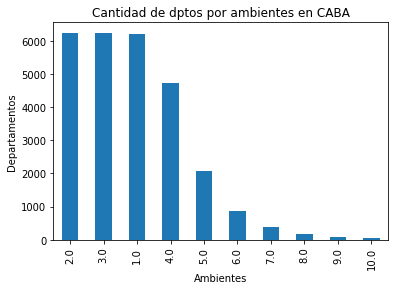

In [12]:
#Punto3_1_2
#aplica filtros
departamentosEnCapFed = propiedades.loc[enCapitalFederal]
listaDeAmbientes = departamentosEnCapFed['rooms'].value_counts()
listaDeAmbientes[:10].plot.bar(xlabel='Ambientes', ylabel='Departamentos', title='Cantidad de dptos por ambientes en CABA')

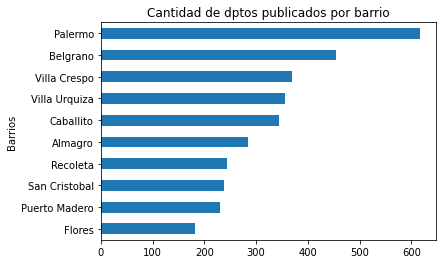

In [13]:
#Punto3_1_3
#aplica filtros
departamentosEnCapFedDeDosAmbientes = propiedades.loc[enCapitalFederal & deDosAmbientes & esDepartamento]

#cantidad por barrio
sumaPorBarrios = departamentosEnCapFedDeDosAmbientes['place_name'].value_counts()

#diez primeros de menor a mayor
diezPrimerosBarriosOrdenados = sumaPorBarrios[:10].sort_values(ascending = True)

#grafico
diezPrimerosBarriosOrdenados.plot.barh(xlabel = 'Barrios', 
                                       ylabel = 'Cantidad de publicaciones', 
                                       title = 'Cantidad de dptos publicados por barrio')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=-58.495347835275766,-34.65344836517273,-58.39534783527577,-34.553448365172734&bboxSR=4326&imageSR=4326&size=1500,1500&dpi=96&format=png32&transparent=true&f=image


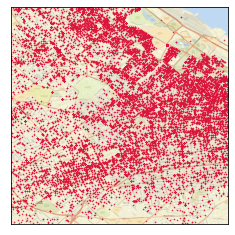

In [17]:
#Punto3_2
#aplica filtros
propiedadesEnElCentroGeograficoCapFed = propiedades.loc[tieneInformacionGeografica & 
                                                        enCapitalFederal & 
                                                        esCercanoAlCentroGeograficoCapFed]

#mapa
mapaCentroGeograficoCapFed = Basemap(
    projection='cyl',
    lat_0 = monumentoCidCampeador['LATITUD'],
    lon_0 = monumentoCidCampeador['LONGITUD'],
    llcrnrlon = LONGITUD_MINIMA,
    llcrnrlat = LATITUD_MINIMA,
    urcrnrlon = LONGITUD_MAXIMA,
    urcrnrlat = LATITUD_MAXIMA)

#servicio
mapaCentroGeograficoCapFed.arcgisimage(service='World_Street_Map', xpixels = 1500, verbose= True)

#lista de longitudes y latitudes
longitudes = propiedadesEnElCentroGeograficoCapFed.lon.to_list()
latitudes = propiedadesEnElCentroGeograficoCapFed.lat.to_list()

#agregar al mapa los puntos
x, y = mapaCentroGeograficoCapFed(longitudes, latitudes)

#Scatter s: tamaño, alpha: transparencia
mapaCentroGeograficoCapFed.scatter(x, y, marker = '.', color='crimson', alpha = 1, s = 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


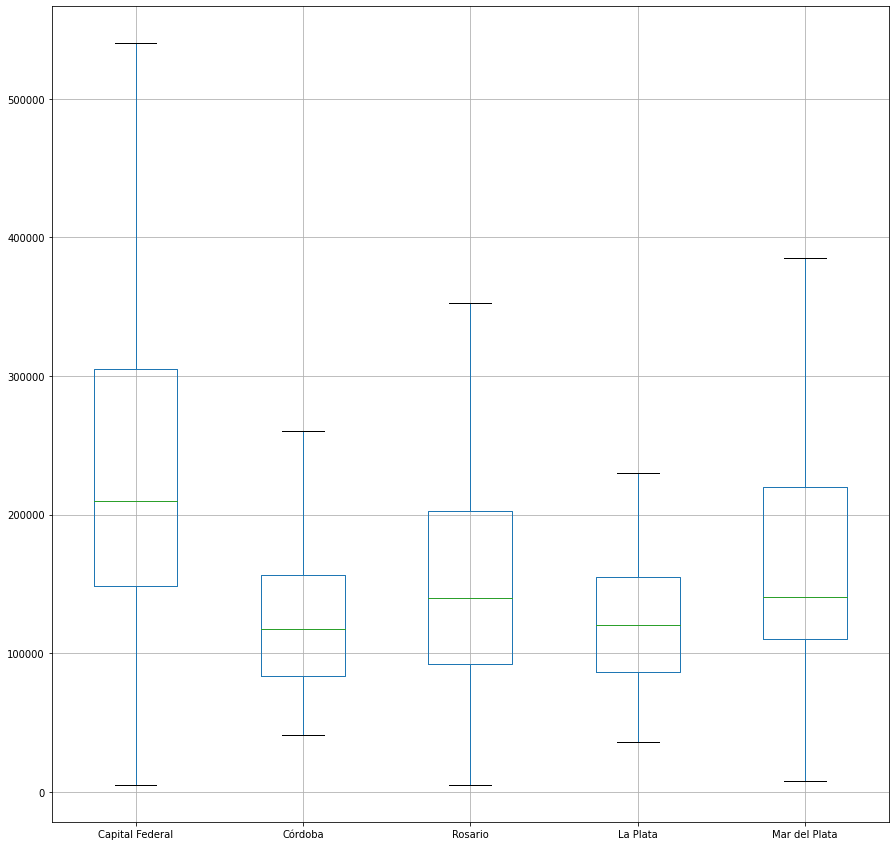

In [9]:
#Punto3_3_1
#aplica filtros
deptosDeTresAmb = propiedades.loc[esDepartamento & deTresAmbientes]

preciosCapital = deptosDeTresAmb.loc[enCapitalFederal]['price_aprox_usd']
preciosCordoba = deptosDeTresAmb.loc[enCordoba]['price_aprox_usd']
preciosRosario = deptosDeTresAmb.loc[enRosario]['price_aprox_usd']
preciosLaPlata = deptosDeTresAmb.loc[enLaPlata]['price_aprox_usd']
preciosMarDelPlata = deptosDeTresAmb.loc[enMarDelPlata]['price_aprox_usd']

preciosDataFrame = pd.concat([preciosCapital, preciosCordoba, preciosRosario, preciosLaPlata, preciosMarDelPlata], axis=1)

preciosDataFrame.columns = [CAPITAL_FEDERAL, CORDOBA, ROSARIO, LA_PLATA, MAR_DEL_PLATA]

preciosDataFrame.boxplot(showfliers=False, figsize=(15, 15))

Punto 3.3.2
Basandose en el grafico anterior, responder a las siguientes preguntas:
1. ¿Cual es la ciudad con mayor costo de vida? Justificar
2. ¿Cual es la ciudad mas equitativa? Justificar
3. Proponer algunos argumentos por los cuales podrıa ser incorrecto deducir las dos respuestas anteriores del conjunto de datos que estamos utilizando

1) Capital Federal es la ciudad con mayor costo de vida, ya que posee la mediana mas alta, por lo tanto la mayoria de sus valores son mas altos que las demas cuidades.

2) La ciudad de La Plata es la mas equitativa, ya que su rango de precios es el mas acotado y sus cuartiles son los mas uniformes del grupo.

3) Para el primer punto un error seria deducir que una ciudad tiene el mayor costo de vida solo por tener los valores mas elevados, sin pensar en la mediana.
Para el segundo punto seria incorrecto pensar que la ciudad mas equitativa fuese la que tenga la mediana mas centrada en su rango, sin tener en cuenta la proporcion de los cuartiles.